<a href="https://colab.research.google.com/github/FabrizioBettetti/Machine-learning/blob/main/Numpy_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

In [1]:
import numpy

In [2]:
numpy.__version__

'2.0.2'

In [3]:
import numpy as np   #Efficient storage AND operations

In [4]:
np?

#Data types

##Creating arrays

In [5]:
import array   #Fixed-type data buffer. Efficient storage

In [6]:
L = list(range(10))
A = array.array('i', L)   #'i': integer
A

array('i', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
x = np.array(12)
x

array(12)

In [8]:
x.ndim

0

In [9]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [10]:
x.ndim

1

In [11]:
np.array([3.14, 4, 2, 3])   #Upcasting

array([3.14, 4.  , 2.  , 3.  ])

In [12]:
np.array([1, 2, 3, 4], dtype='float32')

array([1., 2., 3., 4.], dtype=float32)

In [13]:
np.array([range(i, i + 3) for i in [2, 4, 6]])

array([[2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

In [14]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

In [15]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

In [16]:
np.zeros(10, dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [17]:
np.ones((3, 5), dtype=float)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [18]:
np.full((3, 5), 3.14)

array([[3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14]])

In [19]:
np.arange(0, 20, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [20]:
np.linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [21]:
np.random.random((3, 3))   #Uniform distribution in [0, 1)

array([[0.75630927, 0.75058544, 0.41053336],
       [0.15821286, 0.82995393, 0.21702089],
       [0.97469165, 0.62390173, 0.56739778]])

In [22]:
np.random.normal(0, 1, (3, 3))   #Normal distribution with mean = 0 and standard deviation = 1

array([[ 0.5772286 , -0.92649521,  0.57319531],
       [-1.48173081,  0.63757676,  1.08955887],
       [ 0.63799319,  1.25081518,  1.74965232]])

In [23]:
np.random.randint(0, 10, (3, 3))   #Discrete uniform distribution in [0, 10)

array([[6, 0, 5],
       [5, 8, 8],
       [1, 6, 1]])

In [24]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [25]:
#Create an uninitialized array of three integers.
#The values will be whatever happens to already exist at that memory location
np.empty(3)

array([1., 1., 1.])

##Standard data types

In [26]:
np.zeros(10, dtype='int16')

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int16)

In [27]:
np.zeros(10, dtype=np.int16)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int16)

#Basics of numpy arrays

##Numpy array attributes

In [28]:
np.random.seed(0)

x1 = np.random.randint(10, size=6)
x2 = np.random.randint(10, size=(3, 4))
x3 = np.random.randint(10, size=(3, 4, 5))
#Discrete uniform distribution in [0, 10)

In [29]:
print('x3 ndim:', x3.ndim)
print('x3 shape:', x3.shape)
print('x3 size:', x3.size)

x3 ndim: 3
x3 shape: (3, 4, 5)
x3 size: 60


In [30]:
print('dtype:', x3.dtype)

dtype: int64


In [31]:
print('itemsize:', x3.itemsize, 'bytes')
print('nbytes:', x3.nbytes, 'bytes')

itemsize: 8 bytes
nbytes: 480 bytes


##Array indexing: accessing single elements

In [32]:
x1

array([5, 0, 3, 3, 7, 9])

In [33]:
x1[0]

np.int64(5)

In [34]:
x1[4]

np.int64(7)

In [35]:
x1[-1]

np.int64(9)

In [36]:
x1[-2]

np.int64(7)

In [37]:
x2

array([[3, 5, 2, 4],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

In [38]:
x2[0, 0]

np.int64(3)

In [39]:
x2[2, 0]

np.int64(1)

In [40]:
x2[2, -1]

np.int64(7)

In [41]:
x2[0, 0] = 12
x2

array([[12,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

In [42]:
x1[0] = 3.14159   #Truncated because of integer dtype array
x1

array([3, 0, 3, 3, 7, 9])

##Array slicing: accessing subarrays

In [43]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [44]:
x[:5]

array([0, 1, 2, 3, 4])

In [45]:
x[5:]

array([5, 6, 7, 8, 9])

In [46]:
x[4:7]

array([4, 5, 6])

In [47]:
x[::2]

array([0, 2, 4, 6, 8])

In [48]:
x[1::2]

array([1, 3, 5, 7, 9])

In [49]:
x[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [50]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [51]:
x[5::-2]

array([5, 3, 1])

In [52]:
x2

array([[12,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

In [53]:
x2[:2, :3]

array([[12,  5,  2],
       [ 7,  6,  8]])

In [54]:
x2[:3, ::2]

array([[12,  2],
       [ 7,  8],
       [ 1,  7]])

In [55]:
x2[::-1, ::-1]

array([[ 7,  7,  6,  1],
       [ 8,  8,  6,  7],
       [ 4,  2,  5, 12]])

In [56]:
x2[:, 0]

array([12,  7,  1])

In [57]:
print(x2[:, 0])

[12  7  1]


In [58]:
x2[0, :]

array([12,  5,  2,  4])

In [59]:
print(x2[0, :])

[12  5  2  4]


In [60]:
print(x2[0])   #Equivalent to x2[0, :]. Only in case of row access!

[12  5  2  4]


In [61]:
print(x2)

[[12  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


In [62]:
x2_sub = x2[:2, :2]
print(x2_sub)

[[12  5]
 [ 7  6]]


In [63]:
x2_sub[0, 0] = 99
print(x2_sub)

[[99  5]
 [ 7  6]]


In [64]:
print(x2)

[[99  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


In [65]:
x2_sub_copy = x2[:2, :2].copy()
x2_sub_copy

array([[99,  5],
       [ 7,  6]])

In [66]:
x2_sub_copy[0, 0] = 42
print(x2_sub_copy)

[[42  5]
 [ 7  6]]


In [67]:
print(x2)

[[99  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


##Reshaping of arrays

In [68]:
grid = np.arange(1, 10).reshape((3, 3))
print(grid)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [69]:
x = np.array([1, 2, 3])
x.reshape((1, 3))

array([[1, 2, 3]])

In [70]:
x[np.newaxis, :]

array([[1, 2, 3]])

In [71]:
x.reshape((3, 1))

array([[1],
       [2],
       [3]])

In [72]:
x[:, np.newaxis]

array([[1],
       [2],
       [3]])

##Array concatenation and splitting

In [73]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
np.concatenate([x, y])

array([1, 2, 3, 3, 2, 1])

In [74]:
z = np.array([99, 99, 99])
print(np.concatenate([x, y, z]))

[ 1  2  3  3  2  1 99 99 99]


In [75]:
grid = np.array([[1, 2, 3],
                 [4, 5, 6]])
np.concatenate([grid, grid])   #Concatenate along the first axis

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [76]:
np.concatenate([grid, grid], axis=1)   #Concatenate along the second axis

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

In [77]:
x = np.array([1, 2, 3])
grid = np.array([[9, 8, 7],
                 [6, 5, 4]])
np.vstack([x, grid])

array([[1, 2, 3],
       [9, 8, 7],
       [6, 5, 4]])

In [78]:
y = np.array([[99],
              [99]])
np.hstack([grid, y])

array([[ 9,  8,  7, 99],
       [ 6,  5,  4, 99]])

In [79]:
x = [1, 2, 3, 99, 99, 3, 2, 1]
x1, x2, x3 = np.split(x, [3, 5])   #Split before indexes 3 and 5
print(x1, x2, x3)

[1 2 3] [99 99] [3 2 1]


In [80]:
grid = np.arange(16).reshape((4, 4))
grid

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [81]:
upper, lower = np.vsplit(grid, [2])
print(upper)
print(lower)

[[0 1 2 3]
 [4 5 6 7]]
[[ 8  9 10 11]
 [12 13 14 15]]


In [82]:
np.vsplit(grid, [1, 2])

[array([[0, 1, 2, 3]]),
 array([[4, 5, 6, 7]]),
 array([[ 8,  9, 10, 11],
        [12, 13, 14, 15]])]

In [83]:
left, right = np.hsplit(grid, [2])
print(left)
print(right)

[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]]
[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]]


#Computation on numpy arrays: universal functions

##The slowness of loops

In [84]:
np.random.seed(0)

def compute_reciprocals(values):
  output = np.empty(len(values))
  for i in range(len(values)):
    output[i] = 1.0 / values[i]
  return output

values = np.random.randint(1, 10, size=5)
compute_reciprocals(values)

array([0.16666667, 1.        , 0.25      , 0.25      , 0.125     ])

In [85]:
big_array = np.random.randint(1, 100, size=1000000)
%timeit compute_reciprocals(big_array)

3.24 s ± 1.77 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


##Introducing ufuncs

In [86]:
print(compute_reciprocals(values))
print(1.0 / values)

[0.16666667 1.         0.25       0.25       0.125     ]
[0.16666667 1.         0.25       0.25       0.125     ]


In [87]:
%timeit 1.0 / big_array

1.88 ms ± 280 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [88]:
np.arange(5) / np.arange(1, 6)

array([0.        , 0.5       , 0.66666667, 0.75      , 0.8       ])

In [89]:
x = np.arange(9).reshape((3, 3))
2 ** x

array([[  1,   2,   4],
       [  8,  16,  32],
       [ 64, 128, 256]])

##Exploring numpy's ufuncs

In [90]:
x = np.arange(4)
print('x     =', x)
print('x + 5 =', x + 5)
print('x - 5 =', x - 5)
print('x * 2 =', x * 2)
print('x / 2 =', x / 2)
print('x // 2 =', x // 2)

x     = [0 1 2 3]
x + 5 = [5 6 7 8]
x - 5 = [-5 -4 -3 -2]
x * 2 = [0 2 4 6]
x / 2 = [0.  0.5 1.  1.5]
x // 2 = [0 0 1 1]


In [91]:
print('-x     =', -x)
print('x ** 2 =', x ** 2)
print('x % 2  =', x % 2)

-x     = [ 0 -1 -2 -3]
x ** 2 = [0 1 4 9]
x % 2  = [0 1 0 1]


In [92]:
-(0.5 * x + 1) ** 2

array([-1.  , -2.25, -4.  , -6.25])

In [93]:
np.add(x, 2)

array([2, 3, 4, 5])

In [94]:
x = np.array([-2, -1, 0, 1, 2])
abs(x)   #Python

array([2, 1, 0, 1, 2])

In [95]:
np.absolute(x)   #Numpy

array([2, 1, 0, 1, 2])

In [96]:
np.abs(x)

array([2, 1, 0, 1, 2])

In [97]:
x = np.array([3 - 4j, 4 - 3j, 2 + 0j, 0 + 1j])
np.abs(x)

array([5., 5., 2., 1.])

In [98]:
theta = np.linspace(0, np.pi, 3)
print('theta      =', theta)
print('sin(theta) =', np.sin(theta))
print('cos(theta) =', np.cos(theta))
print('tan(theta) =', np.tan(theta))

theta      = [0.         1.57079633 3.14159265]
sin(theta) = [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta) = [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta) = [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


In [99]:
x = [-1, 0, 1]
print('x         =', x)
print('arcsin(x) =', np.arcsin(x))
print('arccos(x) =', np.arccos(x))
print('arctan(x) =', np.arctan(x))

x         = [-1, 0, 1]
arcsin(x) = [-1.57079633  0.          1.57079633]
arccos(x) = [3.14159265 1.57079633 0.        ]
arctan(x) = [-0.78539816  0.          0.78539816]


In [100]:
x = [1, 2, 3]
print('x   =', x)
print('e^x =', np.exp(x))
print('2^x =', np.exp2(x))
print('3^x =', np.power(3, x))

x   = [1, 2, 3]
e^x = [ 2.71828183  7.3890561  20.08553692]
2^x = [2. 4. 8.]
3^x = [ 3  9 27]


In [101]:
x = [1, 2, 4, 10]
print('x        =', x)
print('ln(x)    =', np.log(x))
print('log2(x)  =', np.log2(x))
print('log10(x) =', np.log10(x))

x        = [1, 2, 4, 10]
ln(x)    = [0.         0.69314718 1.38629436 2.30258509]
log2(x)  = [0.         1.         2.         3.32192809]
log10(x) = [0.         0.30103    0.60205999 1.        ]


In [102]:
x = [0, 0.001, 0.01, 0.1]
print('exp(x) - 1 =', np.expm1(x))
print('log(1 + x) =', np.log1p(x))

exp(x) - 1 = [0.         0.0010005  0.01005017 0.10517092]
log(1 + x) = [0.         0.0009995  0.00995033 0.09531018]


In [103]:
from scipy import special

In [104]:
x = [1, 5, 10]
print('gamma(x)     =', special.gamma(x))
print('ln|gamma(x)| =', special.gammaln(x))
print('beta(x, 2)   =', special.beta(x, 2))

gamma(x)     = [1.0000e+00 2.4000e+01 3.6288e+05]
ln|gamma(x)| = [ 0.          3.17805383 12.80182748]
beta(x, 2)   = [0.5        0.03333333 0.00909091]


In [105]:
x = np.array([0, 0.3, 0.7, 1.0])
print('erf(x)    =', special.erf(x))
print('erfc(x)   =', special.erfc(x))     #Complement of error function
print('erfinv(x) =', special.erfinv(x))   #Inverse of error function

erf(x)    = [0.         0.32862676 0.67780119 0.84270079]
erfc(x)   = [1.         0.67137324 0.32219881 0.15729921]
erfinv(x) = [0.         0.27246271 0.73286908        inf]


##Advanced ufuncs features

In [106]:
x = np.arange(5)
y = np.empty(5)
np.multiply(x, 10, out=y)
print(y)

[ 0. 10. 20. 30. 40.]


In [107]:
y = np.zeros(10)
np.power(2, x, out=y[::2])
print(y)

[ 1.  0.  2.  0.  4.  0.  8.  0. 16.  0.]


In [108]:
x = np.arange(1, 6)
np.add.reduce(x)

np.int64(15)

In [109]:
np.multiply.reduce(x)

np.int64(120)

In [110]:
np.add.accumulate(x)

array([ 1,  3,  6, 10, 15])

In [111]:
np.multiply.accumulate(x)

array([  1,   2,   6,  24, 120])

In [112]:
x = np.arange(1, 6)
np.multiply.outer(x, x)   #Product of each couple of elements in x

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

#Aggregations: min, max and everything in between

##Summing the values in an array

In [113]:
L = np.random.random(100)
sum(L)   #Python

np.float64(50.461758453195614)

In [114]:
np.sum(L)   #Numpy

np.float64(50.46175845319564)

In [115]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

99.2 ms ± 760 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
463 µs ± 129 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


##Minimum and maximum

In [116]:
min(big_array), max(big_array)   #Python

(np.float64(7.071203171893359e-07), np.float64(0.9999997207656334))

In [117]:
np.min(big_array), np.max(big_array)   #Numpy

(np.float64(7.071203171893359e-07), np.float64(0.9999997207656334))

In [118]:
%timeit min(big_array)
%timeit np.min(big_array)

65.9 ms ± 1.18 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
371 µs ± 15.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [119]:
print(big_array.min(), big_array.max(), big_array.sum())

7.071203171893359e-07 0.9999997207656334 500216.8034810001


In [120]:
M = np.random.random((3, 4))
print(M)

[[0.79832448 0.44923861 0.95274259 0.03193135]
 [0.18441813 0.71417358 0.76371195 0.11957117]
 [0.37578601 0.11936151 0.37497044 0.22944653]]


In [121]:
M.sum()

np.float64(5.1136763453287335)

In [122]:
M.min(axis=0)

array([0.18441813, 0.11936151, 0.37497044, 0.03193135])

In [123]:
M.max(axis=1)

array([0.95274259, 0.76371195, 0.37578601])

##Example: what is the average heights of US presidents?

In [124]:
!head -4 Datasets/president_heights.csv

order,name,height(cm)
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189


In [125]:
import pandas as pd

In [126]:
data = pd.read_csv('Datasets/president_heights.csv')
heights = np.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185 191 182]


In [127]:
print('Mean height:       ', heights.mean())
print('Standard deviation:', heights.std())
print('Minimum height:    ', heights.min())
print('Maximum height:    ', heights.max())

Mean height:        180.04545454545453
Standard deviation: 6.983599441335736
Minimum height:     163
Maximum height:     193


In [128]:
print('25th percentile:', np.percentile(heights, 25))
print('Median:         ', np.median(heights))
print('75th percentile:', np.percentile(heights, 75))

25th percentile: 174.75
Median:          182.0
75th percentile: 183.5


In [129]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

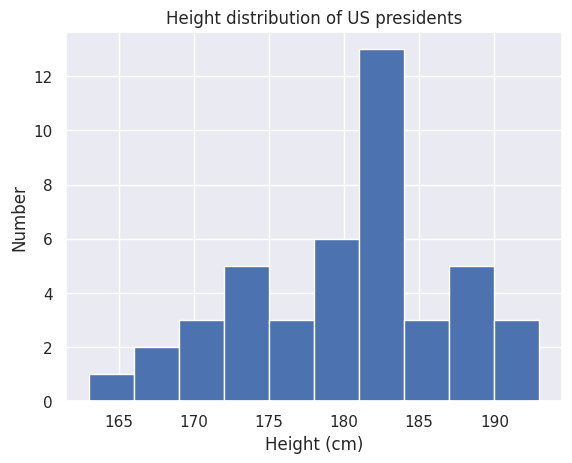

In [130]:
plt.hist(heights)
plt.title('Height distribution of US presidents')
plt.xlabel('Height (cm)')
plt.ylabel('Number')
plt.show()

#Computation on arrays: broadcasting

##Introducing broadcasting

In [131]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

In [132]:
a + 5

array([5, 6, 7])

In [133]:
M = np.ones((3, 3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [134]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [135]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]
print(a)
print(b)

[0 1 2]
[[0]
 [1]
 [2]]


In [136]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [137]:
#M = np.ones((3, 2))
#a = np.arange(3)
#M + a   #Error: broadcasting incompatibility

In [138]:
a[:, np.newaxis].shape

(3, 1)

In [139]:
M + a[:, np.newaxis]

array([[1., 1., 1.],
       [2., 2., 2.],
       [3., 3., 3.]])

In [140]:
np.logaddexp(M, a[:, np.newaxis])

array([[1.31326169, 1.31326169, 1.31326169],
       [1.69314718, 1.69314718, 1.69314718],
       [2.31326169, 2.31326169, 2.31326169]])

In [141]:
X = np.random.random((10, 3))
Xmean = X.mean(0)
Xmean

array([0.49831076, 0.50193438, 0.46752888])

In [142]:
X_centered = X - Xmean   #Broadcasting
X_centered.mean(0)

array([-4.44089210e-17,  3.33066907e-17, -9.43689571e-17])

In [143]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]
z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)
#With broadcasting each couple (x, y) is considered

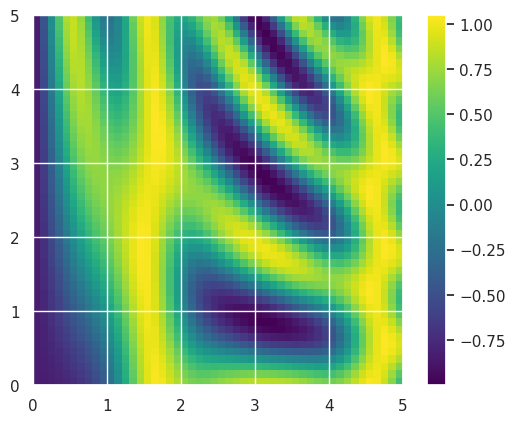

In [144]:
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5], cmap='viridis')
plt.colorbar()
plt.show()

#Comparisons, masks and boolean logic

##Example: counting rainy days

In [145]:
rainfall = pd.read_csv('Datasets/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254   #1/10 mm --> inches
inches.shape

(365,)

(array([245.,  14.,  13.,  17.,   8.,   6.,   5.,   6.,   4.,   3.,   7.,
          6.,   3.,   3.,   3.,   4.,   4.,   2.,   4.,   0.,   0.,   1.,
          1.,   1.,   0.,   0.,   0.,   2.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.04596457, 0.09192913, 0.1378937 , 0.18385827,
        0.22982283, 0.2757874 , 0.32175197, 0.36771654, 0.4136811 ,
        0.45964567, 0.50561024, 0.5515748 , 0.59753937, 0.64350394,
        0.6894685 , 0.73543307, 0.78139764, 0.8273622 , 0.87332677,
        0.91929134, 0.96525591, 1.01122047, 1.05718504, 1.10314961,
        1.14911417, 1.19507874, 1.24104331, 1.28700787, 1.33297244,
        1.37893701, 1.42490157, 1.47086614, 1.51683071, 1.56279528,
        1.60875984, 1.65472441, 1.70068898, 1.74665354, 1.79261811,
        1.83858268]),
 <BarContainer object of 40 artists>)

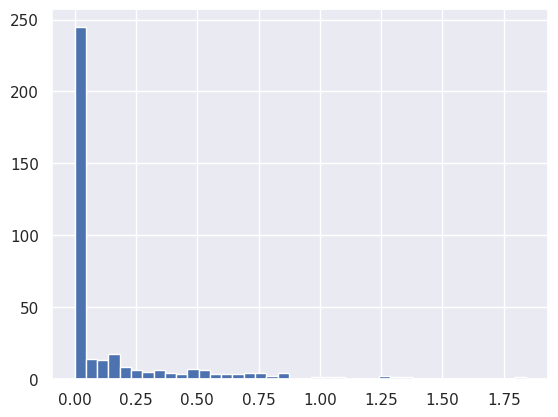

In [146]:
plt.hist(inches, 40)

##Comparison operators as ufuncs

In [147]:
x = np.array([1, 2, 3, 4, 5])
x < 3

array([ True,  True, False, False, False])

In [148]:
x > 3

array([False, False, False,  True,  True])

In [149]:
x <= 3

array([ True,  True,  True, False, False])

In [150]:
x >= 3

array([False, False,  True,  True,  True])

In [151]:
x != 3

array([ True,  True, False,  True,  True])

In [152]:
x == 3

array([False, False,  True, False, False])

In [153]:
(2 * x) == (x ** 2)   #[2, 4, 6, 8, 10] == [1, 4, 9, 16, 25]

array([False,  True, False, False, False])

In [154]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [155]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

##Working with boolean arrays

In [156]:
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


In [157]:
np.count_nonzero(x < 6)   #False as 0

8

In [158]:
np.sum(x < 6)   #In this case: False as 0, True as 1

np.int64(8)

In [159]:
np.sum(x < 6, axis=1)   #How many values less then 6 in each row (column reducing)?

array([4, 2, 2])

In [160]:
np.any(x > 8)

np.True_

In [161]:
np.any(x < 0)

np.False_

In [162]:
np.all(x < 10)

np.True_

In [163]:
np.all(x == 6)

np.False_

In [164]:
np.all(x < 8, axis=1)   #Are all values in each row less than 8?

array([ True, False,  True])

In [165]:
np.sum((inches > 0.5) & (inches < 1))

np.int64(29)

In [166]:
np.sum(~((inches <= 0.5) | (inches >= 1)))

np.int64(29)

In [167]:
print('Number days without rain:      ', np.sum(inches == 0))
print('Number days with rain:         ', np.sum(inches != 0))
print('Days with more than 0.5 inches:', np.sum(inches > 0.5))
print('Rainy days with < 0.1 inches:  ', np.sum((inches > 0) & (inches < 0.2)))

Number days without rain:       215
Number days with rain:          150
Days with more than 0.5 inches: 37
Rainy days with < 0.1 inches:   75


##Boolean arrays as maks

In [168]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [169]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

In [170]:
x[x < 5]   #Select elements of x that are less than 5 (it returns a one-dimensional array)

array([0, 3, 3, 3, 2, 4])

#Deep learning

In [171]:
def naive_relu(x):
  assert len(x.shape) == 2
  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] = max(x[i, j], 0)
  return x

In [172]:
def naive_add(x, y):
  assert len(x.shape) == 2
  assert x.shape == y.shape
  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] += y[i, j]
  return x

In [173]:
import time

x = np.random.random((20, 100))   #Matrix 20 x 100
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
  z = x + y
  z = np.maximum(z, 0.)
print('Took: {0:.2f} s'.format(time.time() - t0))

Took: 0.01 s


In [174]:
t0 = time.time()
for _ in range(1000):
  z = naive_add(x, y)
  z = naive_relu(z)
print('Took: {0:.2f} s'.format(time.time() - t0))

Took: 3.10 s


In [175]:
import numpy as np

#Broadcast
x = np.random.random((32, 10))
y = np.random.random((10,))
y = np.expand_dims(y, axis=0)
Y = np.concatenate([y] * 32, axis=0)
Y.shape

(32, 10)

In [176]:
#Broadcast
def naive_add_matrix_and_vector(x, y):
  assert len(x.shape) == 2
  assert len(y.shape) == 1
  assert x.shape[1] == y.shape[0]
  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] += y[j]
  return x

In [177]:
import numpy as np

x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)   #Broadcast
z.shape

(64, 3, 32, 10)

In [178]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)   #Dot product
z

np.float64(8.01641654736739)

In [179]:
def naive_vector_dot(x, y):   #Dot product
  assert len(x.shape) == 1
  assert len(y.shape) == 1
  assert x.shape[0] == y.shape[0]
  z = 0.
  for i in range(x.shape[0]):
    z += x[i] * y[i]
  return z

In [180]:
def naive_matrix_vector_dot(x, y):   #Matrix multiplication between a matrix and a vector
  assert len(x.shape) == 2
  assert len(y.shape) == 1
  assert x.shape[1] == y.shape[0]
  z = np.zeros(x.shape[0])
  for i in range(x.shape[0]):
    #for j in range(x.shape[1]):
    #  z[i] += x[i, j] * y[j]
    z[i] = naive_vector_dot(x[i, :], y)
  return z

In [181]:
def naive_matrix_dot(x, y):   #Matrix multiplication
  assert len(x.shape) == 2
  assert len(y.shape) == 2
  assert x.shape[1] == y.shape[0]
  z = np.zeros((x.shape[0], y.shape[1]))
  for i in range(x.shape[0]):
    for j in range(y.shape[1]):
      row_x = x[i, :]
      column_y = y[:, j]
      z[i, j] = naive_vector_dot(row_x, column_y)
  return z

In [182]:
x = np.array([[0., 1.],
              [2., 3.],
              [4., 5.]])
x.shape

(3, 2)

In [183]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [184]:
x = x.reshape((2, 3))
x

array([[0., 1., 2.],
       [3., 4., 5.]])

In [185]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)